# NAME : Chirag Vijay

# The Sparks Foundation

# TASK - 1


# Prediction using Supervised Machine Learning

# Analysis of Study performance data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

## Importing the Dataset

In [2]:
data="http://bit.ly/w-data"
df=pd.read_csv(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing the dataset

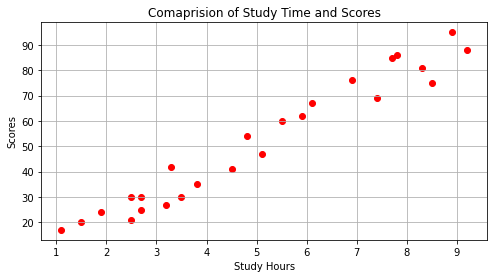

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(df['Hours'],df['Scores'],color = 'red',marker = 'o')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.title('Comaprision of Study Time and Scores')
plt.grid()
plt.show()

## Splitting of data using Sklearn 

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
y=df['Scores'].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [13]:
x = df['Hours'].values.reshape(-1,1)
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 10,test_size = 0.3)

## Importing Linear Regression Model 

In [16]:
from sklearn.linear_model import LinearRegression

In [39]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
train_pred = regressor.predict(x_train)
train_pred

array([60.61459799, 39.47199978, 86.79114814, 70.68250189, 93.83868088,
       62.62817877, 78.73682502, 49.53990369, 79.74361541, 84.77756736,
       28.39730549, 26.38372471, 20.34298236, 26.38372471, 90.81830971,
       36.45162861, 28.39730549])

In [40]:
test_reg = LinearRegression()
test_reg.fit(x_test,y_test)
test_pred = test_reg.predict(x_test)

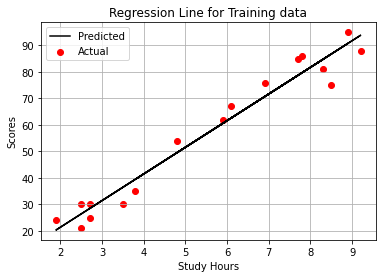

In [52]:
# Visualising the Training Set results
plt.scatter(x_train,y_train,color='red',label="Actual")
plt.plot(x_train,regressor.predict(x_train),color='black',label='Predicted')
plt.legend()
plt.title('Regression Line for Training data')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

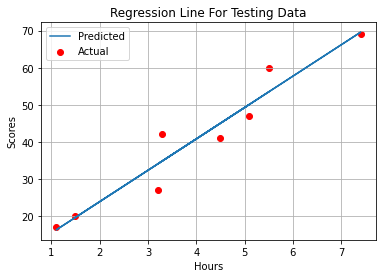

In [53]:
plt.scatter(x_test,y_test,color= 'red',marker = 'o',label='Actual')
plt.plot(x_test,test_pred,label='Predicted')
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Scores',)
plt.title('Regression Line For Testing Data')
plt.grid()
plt.show()

## R squared value to check the accuracy of the tested data based on the 30% of the test size 

In [61]:
from sklearn.metrics import mean_absolute_error
TestR_Squared_value = test_reg.score(x_test,y_test)
print(TestR_Squared_value)
print('Mean absolute error: ', mean_absolute_error(y_test, test_pred))

0.9291687992802092
Mean absolute error:  3.6828286082474224


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [62]:
hours = [9.25]
predicted_score=regressor.predict([hours])
print("So, the predicted score if a student studies for 9.25 hrs/day = {}".format(round(predicted_score[0],3)))

So, the predicted score if a student studies for 9.25 hrs/day = 94.342
